In [58]:
from sklearn.datasets import load_breast_cancer

In [59]:
breast_cancer = load_breast_cancer()

In [60]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [61]:
breast_cancer.data.shape

(569, 30)

In [62]:
breast_cancer.target.shape

(569,)

In [63]:
from sklearn.model_selection import train_test_split
data = breast_cancer.data
target = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [66]:
nb.fit(X_train, y_train)

GaussianNB()

In [67]:
predicted = nb.predict(X_test)
actual = y_test

In [68]:
predicted[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [69]:
actual[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [70]:
nb.score(X_test, y_test)

0.958041958041958

In [71]:
print(f'{nb.score(X_test, y_test):.2%}')

95.80%


In [72]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=actual, y_pred=predicted)

In [73]:
matrix

array([[51,  3],
       [ 3, 86]])

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_true=actual, y_pred=predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [75]:
import pandas as pd
import seaborn as sns

In [76]:
matrix_df = pd.DataFrame(matrix)

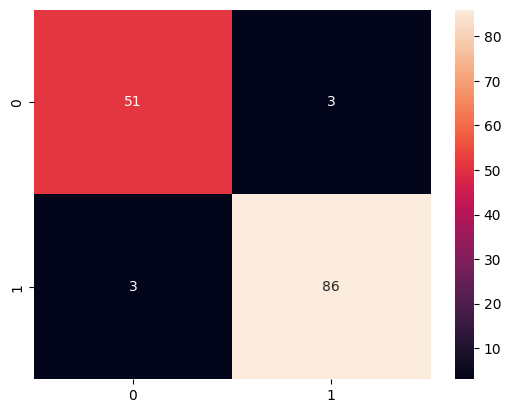

In [77]:
axes = sns.heatmap(matrix_df, annot=True)

In [78]:
from sklearn.model_selection import KFold

In [79]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=nb, X=data, y=target, cv=kfold)

In [81]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [82]:
print(f'Mean accuracy: {scores.mean():.2%} Standard Deviation: {scores.std():.2%}')

Mean accuracy: 93.85% Standard Deviation: 2.75%


In [83]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
estimators = {'GaussianNB':nb,
              'KNeighborsClassifier':KNeighborsClassifier(),
              'LogisticRegression':LogisticRegression(solver='lbfgs',multi_class='ovr',max_iter=10000),
              'SVC':SVC(gamma='scale')}

In [85]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=data, y=target, cv=kfold)
  print(f'{estimator_name:>20}: mean accuracy={scores.mean():.2%}; standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
